# Homework Assignment 3

# Name: Garv Gaur

This assignment will cover applications of text analysis regarding clustering and classification. For this assignment, you should write/type your answers into this notebook. Please submit your compiled code to Gradescope. Note: your file should be less than 1MB so that it can be viewed and graded in Gradescope. See Ed Discussion for more information on this. 

You may discuss the problem set with your class mates, but every student must do their own work. It is always important to cite our references that help us in our work. Please cite the students you work with here: ____________________


Packages to Install

If you are using Anaconda:
```python
conda install -c conda-forge transformers
conda install -c anaconda nltk
conda install -c conda-forge fuzzywuzzy
conda install -c conda-forge python-levenshtein
```

If you are using Pip:
```
pip install nltk
pip install -q transformers
pip install fuzzywuzzy
pip install python-Levenshtein
```

There may be other packages you need to install, depending on what you already have installed for your projects and past homeworks.

PACKGES TO IMPORT:
```python
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz
from sklearn.linear_model import LogisticRegression
from transformers import pipeline
```

# I. CODING EFFICIENCY AND COMMENTING 
10 points will be given according to the efficiency and cleanliness of your code. It should produce output that answers the questions from the homework only and everything should be commented. Furthermore, your writeup and code should be submitted both to Canvas and Github. These points are meant to encourage and reward good coding habits.

## II. DOWNLOAD DATA, SUMMARIZE, AND PROCESS TEXT
1. Download data on covid tweets from canvas or from Kaggle:
https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/download
Load both the training and testing files into python.

In [1]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz
from sklearn.linear_model import LogisticRegression
from transformers import pipeline

c:\Users\garvg\anaconda3\envs\mlta\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Instantiate path to data directory
data_path = "C:\\Users\\garvg\\OneDrive\Documents\\GitHub\\ECON1680-Sp24\\Homework\\HW 3\\HW3_data_covidtweets\\"
# Load training and testing data into pandas dataframes
tweet_train = pd.read_csv(data_path + "Corona_NLP_train.csv", encoding='latin-1')
tweet_test = pd.read_csv(data_path + "Corona_NLP_test.csv", encoding='latin-1')

2. Plot histogram of sentiment categories in the training dataframe. Hint: Use
df[‘Sentiment’] .value_counts().reindex(["Extremely Negative", "Negative", "Neutral",
"Positive", "Extremely Positive"]).plot(kind='bar') to control ordering of categories. Be
sure to add title and labels for your axes.

    Insert your graph here:

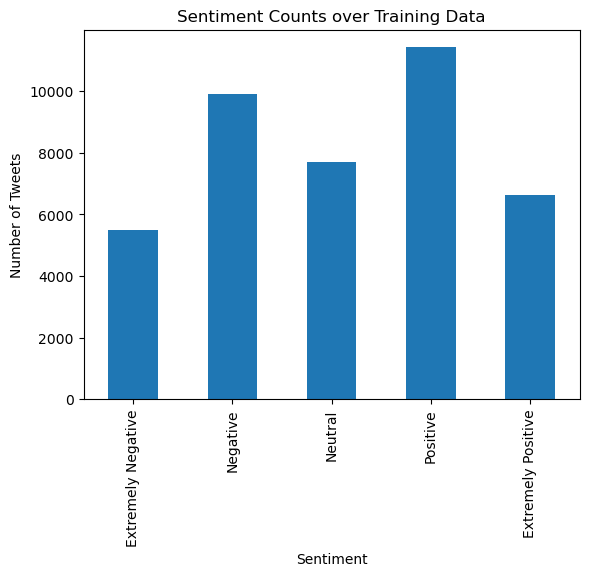



<Axes: title={'center': 'Sentiment Counts over Training Data'}, xlabel='Sentiment', ylabel='Number of Tweets'>

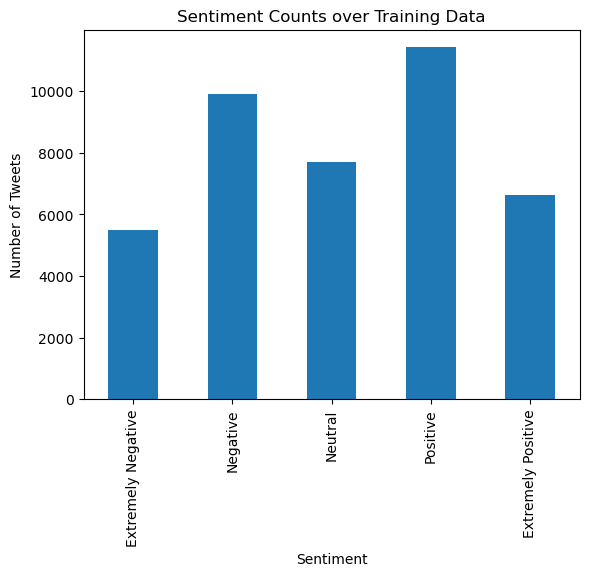

In [3]:
# Aggregate data counts and plot
train_hist_data = tweet_train["Sentiment"].value_counts().reindex(["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])
train_hist_data.plot(kind='bar', title="Sentiment Counts over Training Data", xlabel="Sentiment", ylabel="Number of Tweets")

3. Plot histogram of sentiment categories in the testing dataframe.

    Insert your graph here:

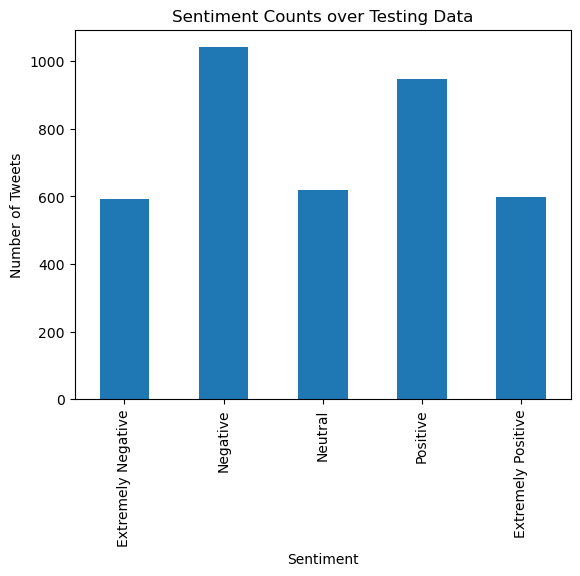


<Axes: title={'center': 'Sentiment Counts over Testing Data'}, xlabel='Sentiment', ylabel='Number of Tweets'>

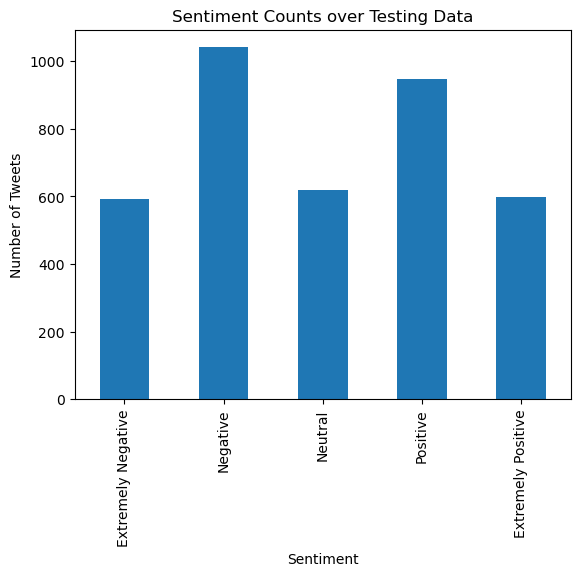

In [4]:
# Aggregate data counts and plot
test_hist_data = tweet_test["Sentiment"].value_counts().reindex(["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])
test_hist_data.plot(kind='bar', title="Sentiment Counts over Testing Data", xlabel="Sentiment", ylabel="Number of Tweets")

4. Compare the distributions. Do you think this is a good training/testing split? Why or why
not? 

    Write your answer here in 2-3 sentences:
    
The distributions seem approximately the same, with less extreme and neutral tweets than positive/negative tweets. This is probably a good training/testing split for this reason, as the training data is approximately a representative distribution of the testing data.

5. For this homework, you will be working with the testing dataset only because it is a
smaller sample. Furthermore, drop all Neutral labelled tweets. Call this dataframe:
df_tweet. How many observations (tweets) does this new dataframe have?

    Write your answer here:

    This new dataframe has 3179 observations. 

In [5]:
# Set df_tweet to testing split without Neutral tweets and print shape
df_tweet = tweet_test[tweet_test["Sentiment"] != "Neutral"]
print(df_tweet.shape)
# Reset indices
df_tweet.reset_index(drop=True, inplace=True)
df_tweet.head()

(3179, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive


# III. PROCESSING AND CLEANING TEXT
6. To clean the tweets a little, run the following code. NOTE: this code will take between 5-
10 minutes to run on a laptop. Explain what each line is doing:

```python
cleantweet=[]
for i in range(len(df_tweet)):
    tweet=tweet.replace('\r',' ')
    tweet=tweet.replace('\n',' ')
    tweet=tweet.replace('. ',' ')
    tweet=tweet.replace(', ',' ')
    tokens = tweet.split(' ')
    tweet_hashtags=[]
    tweet_token=[]
    for t in tokens:
        if "https:" not in t:
            tweet_token.append(t)
    cleantweet.append(" ".join(tweet_token).lower())
df_tweet['clean tweet']= cleantweet

#### Below Takes a few min to run. 5-10
similar_level=85
duplicate_index = []
for original in range(len(df_tweet)-1):
    if original not in duplicate_index:
    for compared in range(original+1, len(df_tweet)):
    if compared not in duplicate_index:
        if fuzz.ratio(df_tweet['clean tweet'][original], df_tweet['clean tweet'][compared]) >= similar_level:
            duplicate_index.append(compared)
    print(round((original / len(df_tweet) * 100),3),'%' ) #Allows to track progress as code runs by printing out percent of tweets completed
df_tweet.drop(duplicate_index, inplace=True)
df_tweet.reset_index(drop=True, inplace=True)
```

In [6]:
# Clean tweets: remove punctuation, tokenize, lowercase, and rejoin without urls
# This empty list will contain cleaned tweets
cleantweet=[]
# For each row in our dataframe
for i in range(len(df_tweet)):
    # Select the tweet text for that row
    tweet = df_tweet["OriginalTweet"].iloc[i]
    tweet = tweet.replace('\r',' ') # Replace carriage returns with spaces
    tweet = tweet.replace('\n',' ') # Replace newlines with spaces
    tweet = tweet.replace('. ',' ') # Replace periods + spaces with spaces
    tweet = tweet.replace(', ',' ') # Replace commas + spaces with spaces
    tokens = tweet.split(' ') # Split each tweet into tokens by spaces
    tweet_token = [] # Create an empty list to store relevant tokens
    # For each token
    for t in tokens:
        # If token is not a url
        if "https:" not in t:
            # Append token to empty list
            tweet_token.append(t)
    # Join tokens with spaces between, and convert everything to lowercase.
    cleantweet.append(" ".join(tweet_token).lower()) # Add this to cleantweet list
# Create a new column called 'clean tweet' containing the processed tweet
df_tweet['clean tweet'] = cleantweet

#### Below Takes a few min to run. 5-10
# Remove tweets that are so similar we consider them duplicates
similar_level = 85 # Set threshold for similarity to 85
duplicate_index = [] # Create empty list for indices of similar tweets

# For each row in df_tweet
for original in range(len(df_tweet)-1):
    if original not in duplicate_index:
        # For each row after the current row
        for compared in range(original+1, len(df_tweet)):
            # If we have not compared it already
            if compared not in duplicate_index:
                # Compute the Levenshtein distance between the two tweets. If it is greater than or
                #   equal to some ratio
                if fuzz.ratio(df_tweet['clean tweet'].iloc[original], df_tweet['clean tweet'].iloc[compared]) >= similar_level:
                    duplicate_index.append(compared) # Append to duplicate index
                    #print("X:", end=" ")
                    #print(original, compared)
    # Print the percentage of tweets processed
    print((original / (len(df_tweet) - 1) * 100), '%')

df_tweet.drop(duplicate_index, inplace=True) # Drop all duplicate indices (similar tweets)
df_tweet.reset_index(drop=True, inplace=True) # Reset the indices to default

C:\Users\garvg\AppData\Local\Temp\ipykernel_18912\158756615.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['clean tweet'] = cleantweet


0.0 %
0.031466331025802395 %
0.06293266205160479 %
0.09439899307740718 %
0.12586532410320958 %
0.15733165512901195 %
0.18879798615481436 %
0.22026431718061676 %
0.25173064820641916 %
0.28319697923222154 %
0.3146633102580239 %
0.34612964128382634 %
0.3775959723096287 %
0.40906230333543103 %
0.4405286343612335 %
0.4719949653870359 %
0.5034612964128383 %
0.5349276274386406 %
0.5663939584644431 %
0.5978602894902455 %
0.6293266205160478 %
0.6607929515418502 %
0.6922592825676527 %
0.723725613593455 %
0.7551919446192574 %
0.7866582756450597 %
0.8181246066708621 %
0.8495909376966646 %
0.881057268722467 %
0.9125235997482695 %
0.9439899307740718 %
0.9754562617998742 %
1.0069225928256766 %
1.038388923851479 %
1.0698552548772813 %
1.1013215859030838 %
1.1327879169288861 %
1.1642542479546885 %
1.195720578980491 %
1.2271869100062933 %
1.2586532410320956 %
1.2901195720578982 %
1.3215859030837005 %
1.3530522341095028 %
1.3845185651353054 %
1.4159848961611077 %
1.44745122718691 %
1.4789175582127123 %
1

C:\Users\garvg\AppData\Local\Temp\ipykernel_18912\158756615.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet.drop(duplicate_index, inplace=True) # Drop all duplicate indices (similar tweets)


7. Make a list of hashtags for each tweet.

    a. Loop over rows in df_tweet

    b. Split each tweet by spaces using .split(‘ ‘)

    c. Make a list of tokens with # in them. Hint: make a list of lists.

In [7]:
# Make a list of hashtags for each tweet
tweet_hashtags = []
for i in range(len(df_tweet)):
    cleaned_tweet = df_tweet['clean tweet'].iloc[i]
    tokens = cleaned_tweet.split(' ')
    with_hashtags = [i for i in tokens if "#" in i]
    tweet_hashtags.append(with_hashtags)

# Assign these lists to a new column in the dataframe
df_tweet['hashtag tokens'] = tweet_hashtags
print(df_tweet.shape)

(3139, 8)


C:\Users\garvg\AppData\Local\Temp\ipykernel_18912\3194308034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['hashtag tokens'] = tweet_hashtags


8. What are the top 20 most used hashtags? Insert the list of hashtags and how many time each hashtag occur here. Hint: use Counter(chain.from_iterable()) and .most_common().

    Write your answer here:

```
Hashtag: Occurrences
#covid_19: 1233
#coronavirus: 1046
#covid19: 228
#coronaviruspandemic: 177
#covid2019: 142
#coronaoutbreak: 127
#coronapocalypse: 103
#covid?19: 91
#panicbuying: 83
#coronavirusupdate: 49
#coronavirusoutbreak: 44
#corona: 41
#toiletpaper: 36
#retail: 29
#pandemic: 28
#coronavirusupdates: 28
#covid: 24
#food: 23
#lockdown: 23
#covid-19: 22
```

    The 20 most common hashtags in order are #covid_19, #coronavirus, #covid19, #coronaviruspandemic, #covid2019, #coronaoutbreak, #coronapocalypse, #covid?19, #panicbuying, #coronavirusupdate, #coronavirusoutbreak, #corona, #toiletpaper, #retail, #pandemic, #coronavirusupdates, #covid, #food, #lockdown, and #covid-19.

In [8]:
# Count the occurrence of each hashtag and get the 20 most common
top_20 = Counter(chain.from_iterable(tweet_hashtags)).most_common(20)
print("Hashtag: Occurrences")
for i in top_20:
    print(i[0] + ":", i[1])

Hashtag: Occurrences
#covid_19: 1233
#coronavirus: 1046
#covid19: 228
#coronaviruspandemic: 177
#covid2019: 142
#coronaoutbreak: 127
#coronapocalypse: 103
#covid?19: 91
#panicbuying: 83
#coronavirusupdate: 49
#coronavirusoutbreak: 44
#corona: 41
#toiletpaper: 36
#retail: 29
#pandemic: 28
#coronavirusupdates: 28
#covid: 24
#food: 23
#lockdown: 23
#covid-19: 22


9. Using the ‘clean tweet’ variable from problem 6, create term frequency vector representation for all tweets. That is, make a document-term matrix where each document is a tweet and the terms are all the vocabulary from the tweet dataset. Hint: use TfidfVectorizer().fit_transform(). Call your document term matrix X. It should come out as a scipy.sparse.csr.csr_matrix object. 

    a. What are the dimensions of your matrix?

The matrix is 3139 rows by 11075 columns.


In [9]:
# Create document-term matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_tweet["clean tweet"])
print(X.get_shape())

(3139, 11075)


10. Use .get_feature_names() to make a list of the vocabulary and call it “features”.

    a. Is this list alphabetized automatically? 
        
        Answer here: The list is alphebetized automatically.

    b. What is the word associated with index 1680? 
        
        Answer here: The word associated with index 1680 is caracas.



In [10]:
# Make a list of the vocabulary
features = vectorizer.get_feature_names_out()
print(features[:50])
print(features[1680])

['00' '000' '000x' '0095' '01' '0202628233' '0202779000' '03' '038' '04'
 '0558234767' '07' '0723212218' '0751670284' '0800' '0808' '084' '09'
 '09093052802'
 '093bd1db0c0d3a62af15883138a5f57d4cef35ae14e31e602b74489dd2524c7f'
 '0calamity' '10' '100' '1000' '100029' '1000s' '1000x' '100s' '100â'
 '10am' '10k' '10p' '10pm' '10tv' '10x' '10â' '11' '110' '111' '114' '116'
 '118' '11am' '11pm' '12' '120' '1200' '1220' '12h00' '12million']
caracas


# IV. SIMILARITY MEASURES 
11. Calculate the pairwise similarity between all tweets using cosine similarity. Hint: use the cosine_similarity() command from sklearn and then change it to a dataframe called df_cossim.

In [11]:
# Get the cosine similarity between all documents in X
df_cossim = pd.DataFrame(cosine_similarity(X))

12. Run the following code and explain each step:

```python
df_cossim_tri = pd.DataFrame(np.tril(df_cossim.values, k=-1))
df_rank = df_cossim_tri.unstack().reset_index()
df_rank.columns = ['row', 'column', 'similarity']
```

In [12]:
# Zero all elements on and above above the main diagonal
df_cossim_tri = pd.DataFrame(np.tril(df_cossim.values, k=-1))
# Pivot the matrix so we have each row as a comparison between two tweets
df_rank = df_cossim_tri.unstack().reset_index()
# Assign names to the columns: the row to compare, the column to compare, and their cosine similarity
df_rank.columns = ['row', 'column', 'similarity']

13. Which pairs of tweets have the top 10 highest similarity scores? Below include a table with the tweet pairs and their corresponding similarity score.
    Hint: sort the df_rank dataframe over similarity.
```python
          row  column  similarity
560692    178    1950    0.823146
7457587  2375    2462    0.813846
182383     58     321    0.812653
2547198   811    1469    0.812195
2547671   811    1942    0.803075
2547489   811    1760    0.801398
2546572   811     843    0.799236
8044749  2562    2631    0.795828
5526402  1760    1762    0.795758
535607    170    1977    0.792973
```

In [13]:
# Sort df_rank by similarity and include top 10 pairs
df_rank.sort_values("similarity", ascending=False, inplace=True)
print(df_rank[:10])

          row  column  similarity
560692    178    1950    0.823146
7457587  2375    2462    0.813846
182383     58     321    0.812653
2547198   811    1469    0.812195
2547671   811    1942    0.803075
2547489   811    1760    0.801398
2546572   811     843    0.799236
8044749  2562    2631    0.795828
5526402  1760    1762    0.795758
535607    170    1977    0.792973


14. Spend 3-5 sentences describing what seems to make sense in the similarity matching. What doesn’t make sense? If you wanted to improve matching, what steps would you take now? If you would need to do more cleaning of the data, what would you want to do?

The similarity matching seems like a pretty intuitive process, where tokens are compared to each other to determine similarity. However, something that doesn't make sense is not considering tokens as interrelated. For example, if the word "not" precedes a phrase, we could have two documents that are not similar in their main idea but use a lot of the same words. If the aim is purely to consider the number of words in common, though, this approach makes a lot of sense. If I wanted to improve matching, I might tokenize in a different way, sometimes using compound expressions with modifiers like "not happy" instead of "not" and "happy", which could help match documents that are more similar in their aim. If I would need to do more cleaning of the data, I'd want to maybe check to see if links are similar. We removed all links, but it might be worthwhile to consider links to the same sites as similarities rather than removing them totally.

# V. LOGIT-LASSO REGRESSION 
15. Make a new variable that has binary sentiment (positive=1 and negative=0) where a sentiment of positive and extremely positive is now 1, and then negative and extremely negative is now 0.

In [14]:
# Create binary sentiment measure
df_tweet["sentiment_ind"] = [1 if "Positive" in i else 0 for i in df_tweet["Sentiment"]]

C:\Users\garvg\AppData\Local\Temp\ipykernel_18912\470884887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet["sentiment_ind"] = [1 if "Positive" in i else 0 for i in df_tweet["Sentiment"]]


16. Run a logit lasso regression with binary sentiment as the output variable and your document term matrix as your inputs.
    
    a. Convert your binary sentiment column to an array called y, and your document term matrix to an array called x. Hint: use X.toarray() and  to_numpy() for your df column.

    b. Use the logit regression command with an L1 penalty, liblinear solver, and random state of 1680. Loop over the hyperparameter “C” which controls theweight in front of the penalty by considering values of C in [0.001, 0.01, 0.1, 1, 10, 100, 1000]. Hint: model.score(x,y) will tell you the prediction accuracy for the logit model fit to x,y. Pick the C value that has the maximum accuracy.

        Answer here: The optimal C value we select could be either 100 or 1000. Here, we select 1000.

    c. Save the model coefficients as “coefs”. Hint: use model.coef_

    d. Run the following code and explain each line
    
    ```python
    df_coef = pd.DataFrame({'word': features, 'coef': coefs[-1].tolist()}) df_coef['abs coef']= df_coef['coef'].abs()
    df_tweet['logitlasso predicted sentiment'] = model.predict(x)
    ```

In [15]:
# Instantiate sentiment indices and document-term matrix
y = df_tweet["sentiment_ind"].to_numpy()
x = X.toarray()

# Make a list of candidates for C and variables to measure maximized accuracy
C_list = [10 ** i for i in range(-3, 4)]
model = None
coefs = None
max_accuracy = 0
max_accuracy_C = []

# For each C, check if the Logit regression has the highest accuracy so far
for C_val in C_list:
    logit_reg = LogisticRegression(penalty="l1", solver="liblinear", C=C_val,random_state=1680).fit(x, y)
    if logit_reg.score(x, y) > max_accuracy:
        # If so, save the accuracy for future comparisons and the model coefficients
        max_accuracy = logit_reg.score(x, y)
        coefs = logit_reg.coef_
        model = logit_reg
        max_accuracy_C = [C_val]
    elif logit_reg.score(x, y) == max_accuracy:
        max_accuracy_C.append(C_val)
        coefs = logit_reg.coef_
        model = logit_reg
# Print optimal C
print(max_accuracy_C)

# Create new dataframe containing the coefficients associated with each word
df_coef = pd.DataFrame({'word': features, 'coef': coefs[-1].tolist()}) 
# Add column containing the absolute value of each coefficient
df_coef['abs coef'] = df_coef['coef'].abs()
# Add a column in the tweet dataframe containing the predicted sentiment 
#   for each tweet
df_tweet['logitlasso predicted sentiment'] = model.predict(x)

[100, 1000]


C:\Users\garvg\AppData\Local\Temp\ipykernel_18912\2053391597.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['logitlasso predicted sentiment'] = model.predict(x)


17. What are the top 20 most important words for predicting class? These will be the largest coefficients in absolute value. Hint: sort df_coef. 

    Print those top 20 words and their coefficients here.

```
            word       coef
4547        hand  57.971391
8471      safety  57.036883
8223    resource -55.820427
2603      crisis -55.787172
1208        best  55.073160
7108       panic -54.099079
9615   suspended -53.091360
10998       yeah  52.359447
9474      stupid -52.227103
3844         ffs -51.165315
5866         lol  50.306409
4131     friends  50.301985
4414       great  49.908126
9545       super  49.461671
2584      create  48.709611
8689     selfish -47.220806
4096        free  46.910925
2312    convince  46.521386
5756        like  46.097436
4337        good  45.000285

```

In [16]:
# Sort df_coef by absolute value of coefficients and print top 20
df_coef.sort_values("abs coef", ascending=False, inplace=True)
print(df_coef[["word", "coef"]].iloc[:20])

            word       coef
4547        hand  57.971391
8471      safety  57.036883
8223    resource -55.820427
2603      crisis -55.787172
1208        best  55.073160
7108       panic -54.099079
9615   suspended -53.091360
10998       yeah  52.359447
9474      stupid -52.227103
3844         ffs -51.165315
5866         lol  50.306409
4131     friends  50.301985
4414       great  49.908126
9545       super  49.461671
2584      create  48.709611
8689     selfish -47.220806
4096        free  46.910925
2312    convince  46.521386
5756        like  46.097436
4337        good  45.000285


18. What are the top 10 "positive words"? The top 10 "negative words"? 

	Print the top 10 words of each sentiment and their coefficients here.

Top 10 Positive
```
          word       coef
4547      hand  57.971391
8471    safety  57.036883
1208      best  55.073160
10998     yeah  52.359447
5866       lol  50.306409
4131   friends  50.301985
4414     great  49.908126
9545     super  49.461671
2584    create  48.709611
4096      free  46.910925
```
Top 10 Negative
```
            word       coef
8223    resource -55.820427
2603      crisis -55.787172
7108       panic -54.099079
9615   suspended -53.091360
9474      stupid -52.227103
3844         ffs -51.165315
8689     selfish -47.220806
7671    problems -44.944894
10953      wrong -44.628084
4668        hell -43.588740
```

In [17]:
# Sort coefficients from most to least positive and print top 10
df_coef.sort_values("coef", ascending=False, inplace=True)
print(df_coef[["word", "coef"]].iloc[:10])
# Sort coefficients from most to least negative and print top 10
df_coef.sort_values("coef", ascending=True, inplace=True)
print(df_coef[["word", "coef"]].iloc[:10])

          word       coef
4547      hand  57.971391
8471    safety  57.036883
1208      best  55.073160
10998     yeah  52.359447
5866       lol  50.306409
4131   friends  50.301985
4414     great  49.908126
9545     super  49.461671
2584    create  48.709611
4096      free  46.910925
            word       coef
8223    resource -55.820427
2603      crisis -55.787172
7108       panic -54.099079
9615   suspended -53.091360
9474      stupid -52.227103
3844         ffs -51.165315
8689     selfish -47.220806
7671    problems -44.944894
10953      wrong -44.628084
4668        hell -43.588740


# VI. PRETRAINED MACHINE LEARNING ALGORITHM (HUGGING FACE) 

19. Here you will use the HuggingFace package with pre-trained algorithms. This pipeline takes string text as input, not tokens. So you will be using your dataframe from question 5. First work with the default model for sentiment analysis from HuggingFace which is the DistilBERT base uncased model finetuned with SST-2.

    a. Run the following code and explain each line:

    ```python
    sentiment_pipeline = pipeline("sentiment-analysis")
    print(sentiment_pipeline(df_tweet['OriginalTweet'][0:10].tolist()))
    print(df_tweet[‘OriginalTweet’][0:10].tolist()) 
    ```

    b. Paste the output from the code here: 

    [{'label': 'NEGATIVE', 'score': 0.999046266078949}, {'label': 'NEGATIVE', 'score': 0.9964587092399597}, {'label': 'POSITIVE', 'score': 0.9808230996131897}, {'label': 'NEGATIVE', 'score': 0.9943122863769531}, {'label': 'NEGATIVE', 'score': 0.9957156777381897}, {'label': 'NEGATIVE', 'score': 0.9990513920783997}, {'label': 'POSITIVE', 'score': 0.9799407124519348}, {'label': 'NEGATIVE', 'score': 0.9910359382629395}, {'label': 'NEGATIVE', 'score': 0.9969425797462463}, {'label': 'NEGATIVE', 'score': 0.9989578723907471}]
['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1', "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY", 'Find out how you can protect yourself and loved ones from #coronavirus. ?', '#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu', 'Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk', 'HI TWITTER! I am a pharmacist. I sell hand sanitizer for a living! Or I do when any exists. Like masks, it is sold the fuck out everywhere. SHOULD YOU BE WORRIED? No. Use soap. SHOULD YOU VISIT TWENTY PHARMACIES LOOKING FOR THE LAST BOTTLE? No. Pharmacies are full of sick people.', 'Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ??is the sight that greeted me. Barmy! (Btw, whatÂ\x92s so special about tinned tomatoes? ????????????). #Covid_19 #Dublin https://t.co/rGsM8xUxr6', 'Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\n#Covid_19 #SayEntrepreneur \r\r\n#DJSBU https://t.co/HhDJhyQ2Dc', "Beware of counterfeits trying to sell fake masks at cheap prices. Let's defeat coronavirus threat, #Covid_19 collectively. #BeSafe #BeACascader #CoronavirusReachesDelhi \r\r\n#coronavirusindia \r\r\n\r\r\nhttps://t.co/2Ikkmimj4f https://t.co/RB9rtt7Nkc", 'Panic food buying in Germany due to #coronavirus has begun.  But the #organic is left behind! #Hamsterkauf\r\r\n\r\r\nPanic buying is called "Hamster purchases"(HamsterkÃ¤ufe) in German, taken from the way Hamsters stuff their cheeks with food.  \r\r\n\r\r\nhttps://t.co/aYQtLLGW1m']
['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative', 'Positive', 'Extremely Negative', 'Extremely Positive', 'Positive', 'Extremely Negative', 'Extremely Negative']

    c. How does this compare to the original sentiment label? Print out the original sentiment label for the first 10 tweets. 

        Answer here: The model indicates that all but two tweets are negative, but classifies two tweets negatively that were originally classified as positive. It indicates that all "Extremely Positive" tweets in the first 10 tweets are positive and marks the rest negatively.


    d. Do you think the hand coded labels (the original sentiment labels) or the ones predicted by the pre-trained algorithm make more sense? Explain in depth your answer using the text from the tweets as evidence. Why do you think there are differences?


        Answer here: I think the model predicted labels are more accurate. Consider the misclassified tweets: tweet 2 and tweet 8. Tweet two is clearly someone in disbelief that a 2 pack of Purell hand sanitizer is $114.97. They are complaining about the high price, which is hand-coded as positive but is actually negative in sentiment. The model actually, in my opinion, classifies this correctly. Generally, I agree with the other classifications, but for tweet 8, an advertisement for couches is classified as positive in the hand-labeling and (mis-)labeled as negative by the model. However, this is less important to me, since advertisements often use hyperbole and strong words to describe their product ("low prices"), which I could understand being misclassified. Generally, the differences could be because of generally negative language used in a positive context. Take the phrase "unbelievably low prices" from tweet 8. In the context of COVID-19 (and otherwise), unexpected price levels might generally be negative, which could have led to a negative classification by the model despite having a positive connotation to a human.

In [18]:
# Create a pipeline that uses the DistilBERT model for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis")
# Print results of analyzing the first 10 tweets from df_tweet using the pipeline
print(sentiment_pipeline(df_tweet['OriginalTweet'].iloc[0:10].tolist()))
# Print the first 10 tweets
print(df_tweet['OriginalTweet'].iloc[0:10].tolist()) 
# Print sentiment for first 10 tweets
print(df_tweet['Sentiment'].iloc[0:10].tolist())

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'NEGATIVE', 'score': 0.999046266078949}, {'label': 'NEGATIVE', 'score': 0.9964587092399597}, {'label': 'POSITIVE', 'score': 0.9808230996131897}, {'label': 'NEGATIVE', 'score': 0.9943122863769531}, {'label': 'NEGATIVE', 'score': 0.9957156777381897}, {'label': 'NEGATIVE', 'score': 0.9990513920783997}, {'label': 'POSITIVE', 'score': 0.9799407124519348}, {'label': 'NEGATIVE', 'score': 0.9910359382629395}, {'label': 'NEGATIVE', 'score': 0.9969425797462463}, {'label': 'NEGATIVE', 'score': 0.9989578723907471}]
['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1', "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY", 'Find out how you can protect yourself and loved o

20. Look at the other pretrained models in HuggingFace at https://huggingface.co/models?pipeline_tag=textclassification&sort=downloads&search=sentiment.

    a. Which pretrained models would be appropriate for analyzing the Covid Tweets dataset? Name the model you would use, broadly how it was trained, and your reasoning for why you would pick it.

        Answer here: Pretrained models on tweets would probably be best, as the corpus we consider is from Twitter. I will use the cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual (https://arxiv.org/pdf/2209.09824.pdf). It is a XLM-Roberta-base model trained on sentiment annotations sourced from Amazon Mechanical Turk. It is optimized to be multilingual, which perhaps could more accurately capture sentiment of non-English tweet content. It also includes neutral labeling, which might help us understand tweet sentiment in a more nuanced way.

    b. Take the code from 19a. and run the sentiment analysis for the same 10 tweets. Print the predicted labels here:

        Answer here:
        
        [{'label': 'negative', 'score': 0.8346315622329712}, {'label': 'negative', 'score': 0.6929893493652344}, {'label': 'positive', 'score': 0.6069411039352417}, {'label': 'negative', 'score': 0.6583425402641296}, {'label': 'neutral', 'score': 0.8954949378967285}, {'label': 'negative', 'score': 0.9832612872123718}, {'label': 'neutral', 'score': 0.5761532187461853}, {'label': 'neutral', 'score': 0.7510789036750793}, {'label': 'negative', 'score': 0.5014404058456421}, {'label': 'negative', 'score': 0.9488728046417236}]


    c. How do the predicted labels here compare to those from question 19? Explain why you think there are differences / similarities.
    
        Answer here: The predicted labels are the same for the first four, followed by a neutral assessment for tweets 5, 7, and 8. The other tweets are classified in the same way. The neutral tweets are a joke about the importance of COVID-19 in the voting cycle, an expression of surprise on the appearance of a supermarket, and an advertisement. The presence of the neutral classification as a possible way to classify ambiguous tweets is probably a large reason for the differences. As far as the similarities, the model is a derivative of a BERT model, which probably means that it reacts similarly to the DistilBERT model with their assessments of sentiment..

In [20]:
# Create a pipeline that uses the DistilBERT model for sentiment analysis
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual")
# Print results of analyzing the first 10 tweets from df_tweet using the pipeline
print(sentiment_pipeline(df_tweet['OriginalTweet'].iloc[0:10].tolist()))
# Print the first 10 tweets
print(df_tweet['OriginalTweet'].iloc[0:10].tolist()) 

[{'label': 'negative', 'score': 0.8346315622329712}, {'label': 'negative', 'score': 0.6929893493652344}, {'label': 'positive', 'score': 0.6069411039352417}, {'label': 'negative', 'score': 0.6583425402641296}, {'label': 'neutral', 'score': 0.8954949378967285}, {'label': 'negative', 'score': 0.9832612872123718}, {'label': 'neutral', 'score': 0.5761532187461853}, {'label': 'neutral', 'score': 0.7510789036750793}, {'label': 'negative', 'score': 0.5014404058456421}, {'label': 'negative', 'score': 0.9488728046417236}]
['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1', "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY", 'Find out how you can protect yourself and loved one